In [122]:
import re ##stands for regular expression, used for pattern matching,text-analysis
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# sklearn
# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
print(stopwords.words('english')) #stopwords are words that donot add conceptual meaning to it

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [85]:
columns = ['target','ids','date','flag','user','text']
tweet = pd.read_csv('twitter-data.csv',encoding= "ISO-8859-1",names= columns)
tweet.head()
print(len(tweet))
tweet.shape

35001


(35001, 6)

In [86]:
tweet.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

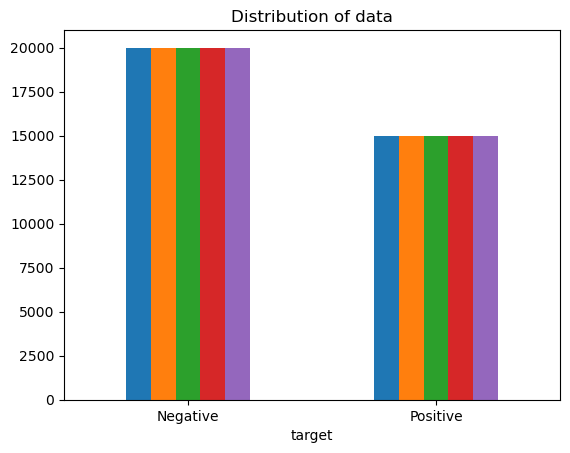

In [87]:
ax = tweet.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
text, sentiment = list(tweet['text']), list(tweet['target'])

In [88]:
#replacing the 4 in target with 1
tweet['target'] = tweet['target'].replace(4,1) # or we can write tweet.replace({'target':(4:1)},inplace=True)
#0 ->neg tweet
#1 ->pos tweet
data=tweet[['text','target']]
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
# print(data_pos)

In [89]:
#STEMMING IS THE PROCESS OF REDUCING A WORD TO ITS ROOTWORD. FOR EXAMPLE ACTING,ACTOR,ACTRESS HAVE ROOT WORD ACT.
port_stem =  PorterStemmer()
def stemming(content):  #content is the text/tweet
    stemmed_content = re.sub('[^a-zA-Z]'," ",content)  #if the text is not an alphabet ie from a-z and A-Z then we are removing it
    stemmed_content = stemmed_content.lower() # converting all characters to lowercase
    stemmed_content = stemmed_content.split()  #splitting all the words and note that into a list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]  #taking 
    #each word from stemmed_content and cheking if it is present in stopword list, stem(word) reduces word to keyword
    stemmed_content = ' '.join(stemmed_content) #joining all tweets together after splitting each word
    
    return stemmed_content

In [90]:
tweet['stemmed_content'] = tweet['text'].apply(stemming) #adding stemmed_content column in dataset

In [91]:
print(tweet['stemmed_content'])
tweet.head()

0        switchfoot http twitpic com zl awww bummer sho...
1        upset updat facebook text might cri result sch...
2        kenichan dive mani time ball manag save rest g...
3                          whole bodi feel itchi like fire
4                            nationwideclass behav mad see
                               ...                        
34996                              grandma make dinenr mum
34997             mid morn snack time bowl chees noodl yum
34998         shadela say like termini movi come like word
34999                      destinyhop im great thaank wbuu
35000                           cant wait til date weekend
Name: stemmed_content, Length: 35001, dtype: object


,target,ids,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [111]:
#separating the data and label
X = tweet['stemmed_content'].values
Y = tweet['target'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X_train.size,X_test.size,Y_train.size,Y_test.size)

28000 7001 28000 7001


In [113]:
#Now we will convert textual data into numeric data, as ml model cannot understand textual data. So we will use FEATURE 
# EXTRACTION, by a method called vectorisation
X_train_texts = [str(x) for x in X_train]
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train_texts)
X_test_transformed= vectorizer.transform(X_test)
#here we are performing two operations, fiting and transforming. By fitting, ml model 
#identifies the nature of data and by tranforming we are converting it into numeric data.

In [123]:
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train_transformed,Y_train)

RandomForestClassifier(n_estimators=30)

In [124]:
X_train_predicted = model.predict(X_train_transformed)
accuracy = accuracy_score(Y_train,X_train_predicted)
print(accuracy)
X_test_predicted = model.predict(X_test_transformed)
accuracy = accuracy_score(Y_test,X_test_predicted)
print(accuracy)

0.9978571428571429
0.7391801171261249


In [134]:
new_input_text = "My GrandMa is making Dinenr with my Mum"
stemmed_input = stemming(new_input_text)
input_transformed = vectorizer.transform([str(stemmed_input)])
predicted_sentiment = model.predict(input_transformed)
if predicted_sentiment[0] == 0:
    print("Negative sentiment")
else:
    print("Positive sentiment")


Positive sentiment
